# DLToolboxImg: Part 2
A set of helper functions that one repeatedly need to construct a dataset from raw images, visualise the performance of a neural network while it is getting trained, evaluate the performance of a model after training is completed. 

As a running example, I will apply the functinos on the LIDC dataset.

# Table of Contents
- [Generate Dataset](#generatedata)
    - [Generate Positive Examples](#pos)
    - [Generate Negative Examples](#neg)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib nbagg

In [2]:
from imports import *

<a id="generatedata"></a>
## Generate Dataset 

### Load the indices for train, valid, and test sets

In [3]:
root_dir="drive/"
interm_dir=root_dir+"interm5/"
filename=interm_dir+"scan_id_split"
with open(filename, 'rb') as f:  # Python 3: open(..., 'wb')
    scan_id_train,scan_id_valid,scan_id_test=pickle.load(f)

In [4]:
scan_id_train,scan_id_valid,scan_id_test

([15, 16, 17, 20, 22, 23], [19], [18, 21, 14])

### Generate Positive Examples
<a id="pos"></a>

In [5]:
!mkdir /home/mas/x110/data/
!mkdir /home/mas/x110/data/pos

mkdir: cannot create directory ‘/home/mas/x110/data/’: File exists
mkdir: cannot create directory ‘/home/mas/x110/data/pos’: File exists


In [6]:
interm_dir2='/home/mas/x110/data/pos'

In [7]:
#choose a scan
scan_id = scan_id_train[0]
scan_1 = ctscan(scan_id) 
scan_id

Loading dicom files ... This may take a moment.


15

In [8]:
#we would like to extract a 52x52x52 patch from the ctscan volume.
#The patch is centered at the noduel centroid
m = 52
cx,cy,cz = scan_1.centroids2[0]
cx,cy,cz

(115, 264, 93)

In [9]:
#grap the volume
image=scan_1.image_normalized #zxy
image.shape

(301, 421, 421)

In [10]:
cube_img,corner0 = get_cube_from_img(image, cx, cy, cz, m)
cube_label,corner1 = get_cube_from_img(scan_1.Z2, cx, cy, cz, m)

In [11]:
cube_img.shape

(52, 52, 52)

<IPython.core.display.Javascript object>


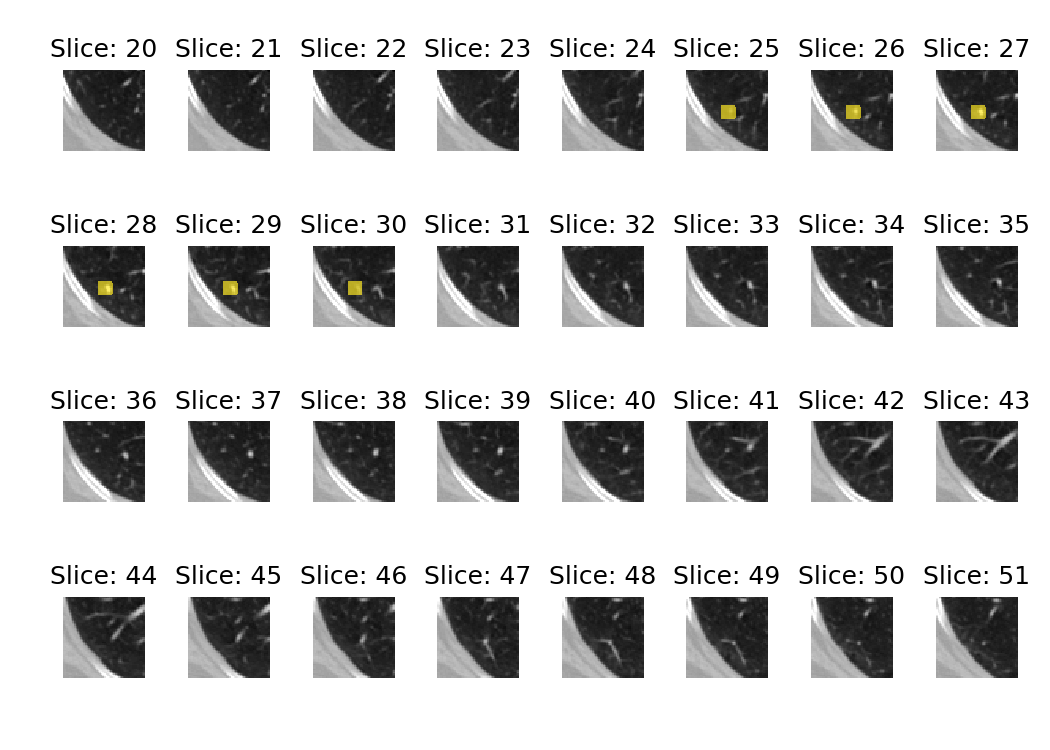

In [12]:
zs=32

X2 = cube_img.copy()
Z2=cube_label.copy()
Z2 = np.ma.masked_where(Z2 ==0 , Z2)

num_rows=4
num_cols=8

f, plots = plt.subplots(num_rows, num_cols, sharex='col', sharey='row', figsize=(7,5))

ind=np.arange(20,65)
for i in range(zs):
    ii=ind[i]
    plots[i // num_cols, i % num_cols].axis('off')
    plots[i // num_cols, i % num_cols].imshow(X2[ii],'gray',vmin=0,vmax=1)

    plots[i // num_cols, i % num_cols].imshow(Z2[ii],alpha=0.7,vmin=0,vmax=1)
    plots[i // num_cols, i % num_cols].set_title("Slice: "+str(ii))
      
plt.tight_layout()

Now repeat the process on the full dataset

In [13]:
for scan_id in scan_id_train:#[xx+1:]:
    try:
        scan_1 = ctscan(scan_id) 
        m=52
        for cx,cy,cz in scan_1.centroids2:
            ### extract a cube with a centroid and size 32x32x32 for image
            image=scan_1.image_resampled #xyz
            image=image.swapaxes(2,1)
            image=image.swapaxes(0,1)
            cube_img,corner0 = get_cube_from_img(image, cx, cy, cz, m)
            cube_label,corner1 = get_cube_from_img(scan_1.Z2, cx, cy, cz, m)

            filename=intermdir2+'/data_P_'+str(scan_id)+"_"+str(cx)+"_"+str(cy)+"_"+str(cz)+".pkl"
            with open(filename, 'wb') as f:  # Python 3: open(..., 'wb')
                pickle.dump([cube_img,cube_label.astype(np.bool)], f)
    except:
        continue
                                                       
#x=[i for i,j in enumerate(scan_id_train) if j==scan_id]
#xx=x[0]

Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.


### Generate Negative Examples
<a id="neg"></a>